In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import matplotlib.colors as cl

from matplotlib.patches import Ellipse as loop


In [2]:
def f(t):
    return -(t - .637) ** 2 / 2 + np.log(np.sqrt(2 * np.pi))

Lx = np.linspace(.637 - 2, .637 + 2)
Ly = f(Lx)

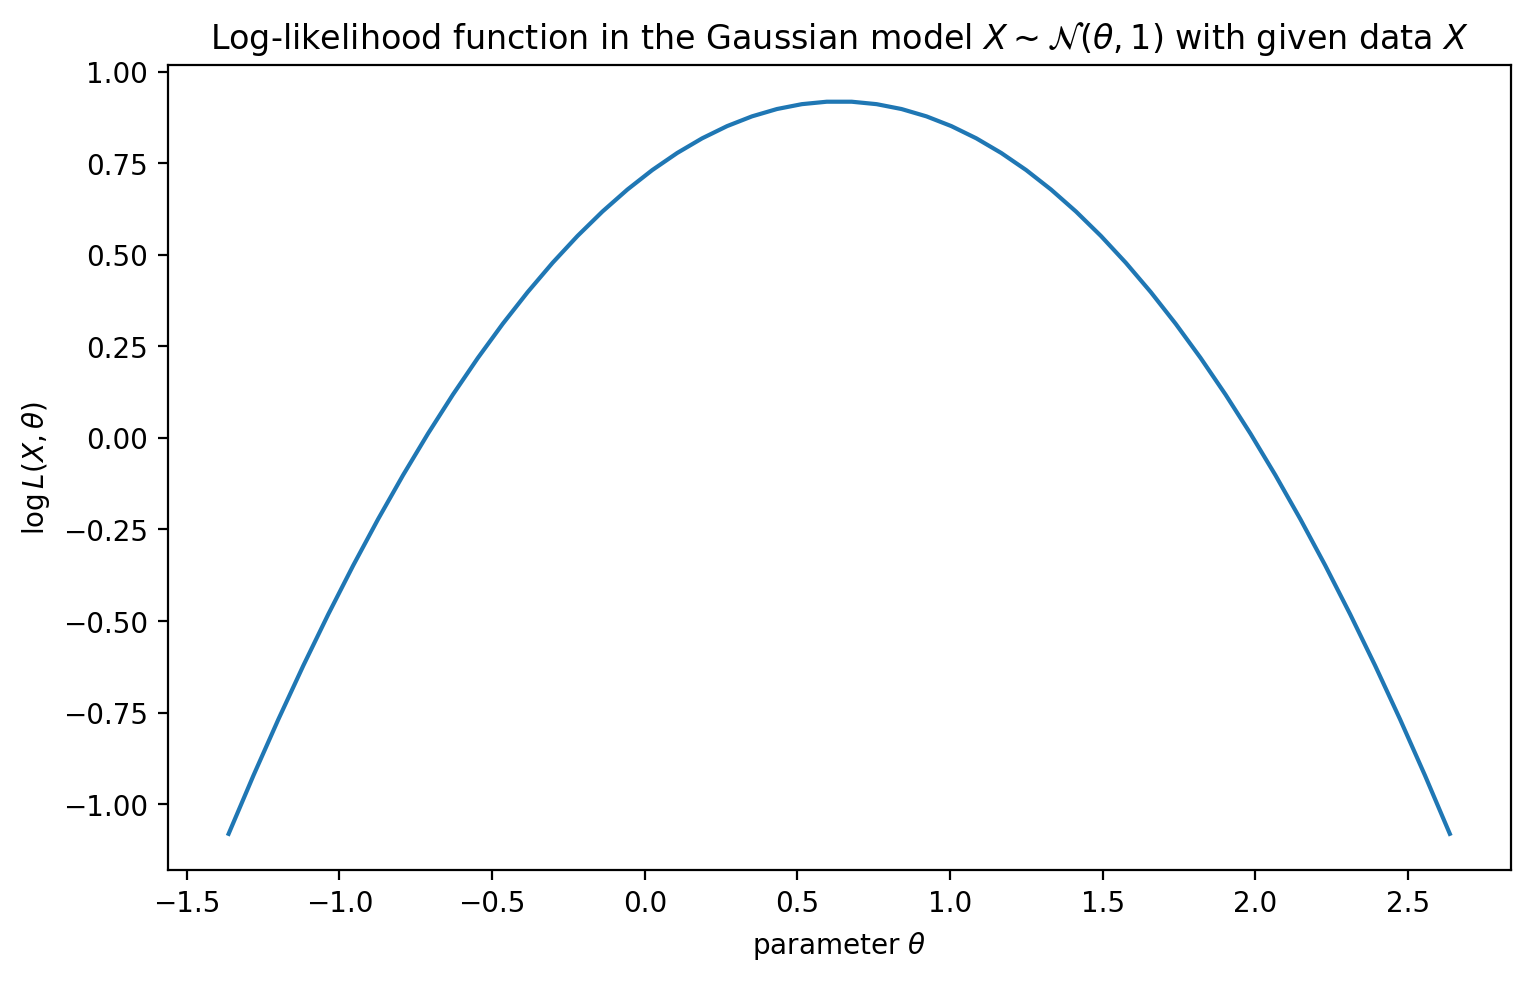

In [3]:
plt.rcParams["figure.figsize"] = (13 / 1.5, 8 / 1.5)
plt.rcParams["figure.dpi"] = 200


plt.plot(Lx, Ly)

plt.xlabel(r"parameter $\theta$")
plt.ylabel(r"$\log L(X, \theta)$")

plt.title(r"Log-likelihood function in the Gaussian model $X \sim \mathcal{N}(\theta, 1)$ with given data $X$")
plt.show()

In [4]:
def display_bin(N, X):
    Lx = list(range(N + 1))
    plt.bar(Lx, X, width = 1)
    return

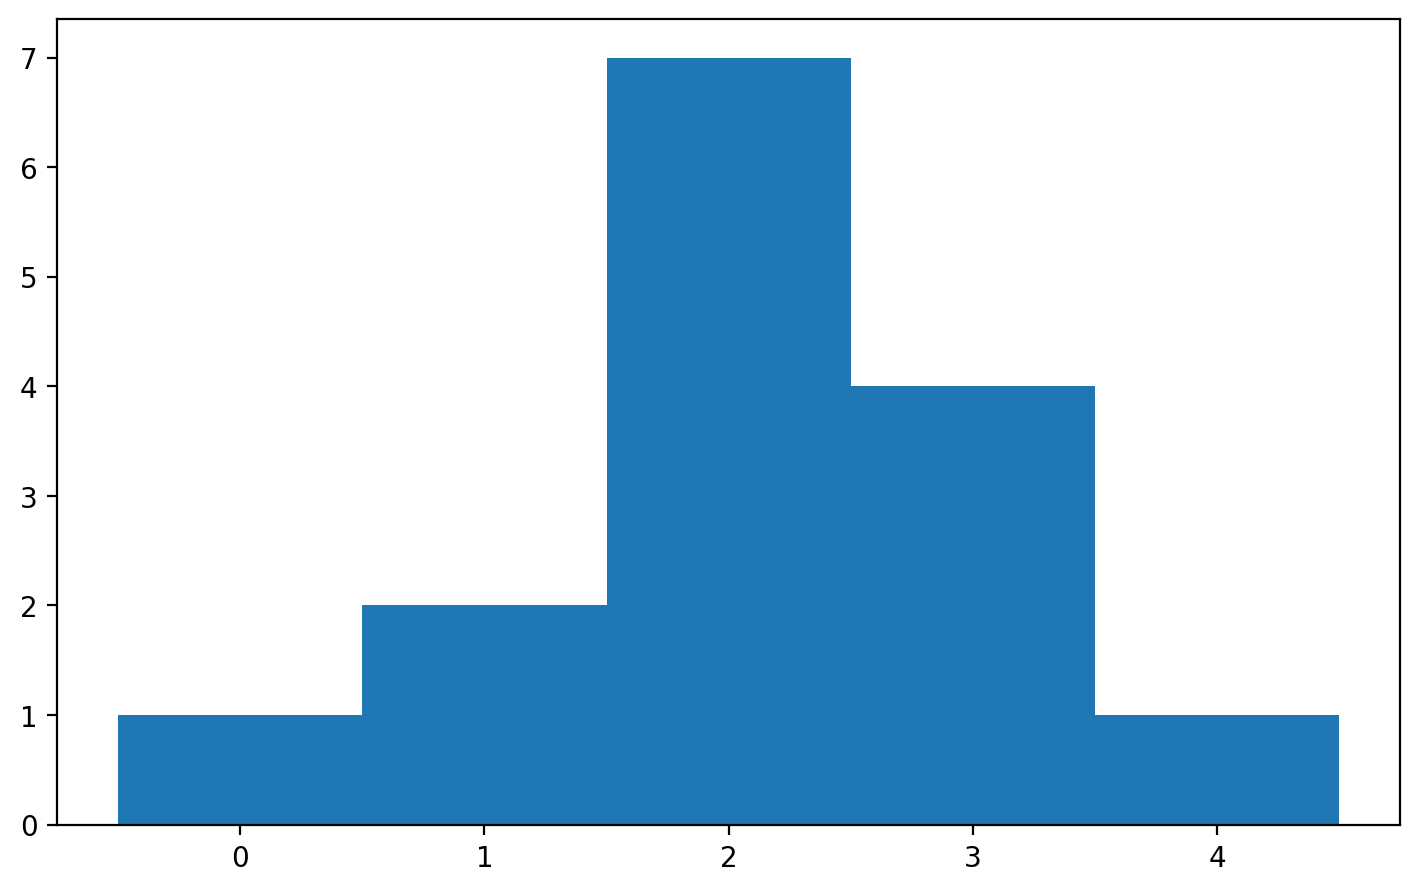

In [5]:


display_bin(4, [1, 2, 7, 4, 1])
plt.show()

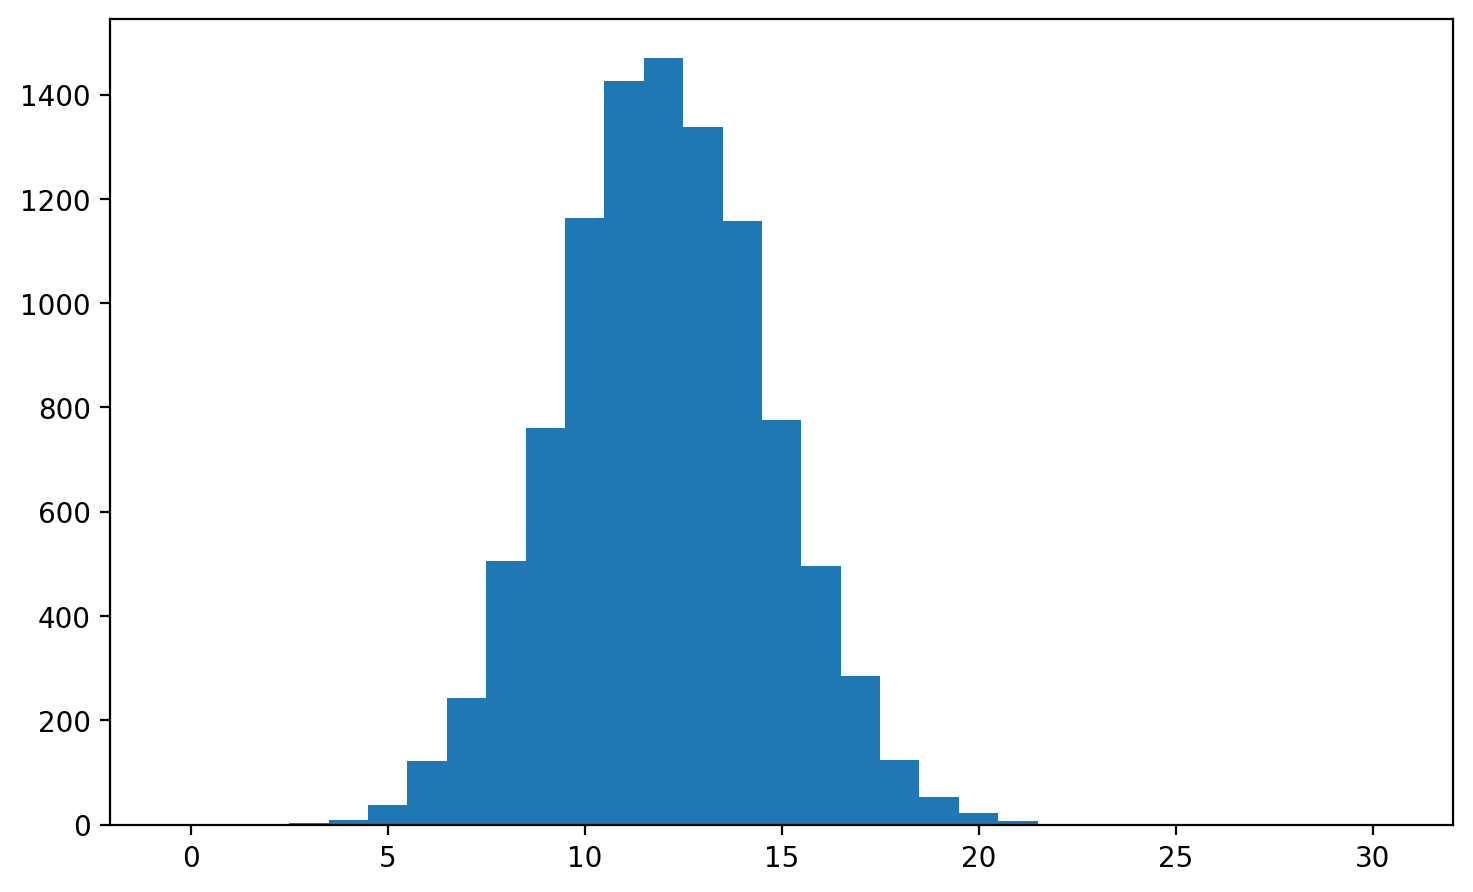

In [6]:
data = st.binom(30, .4).rvs(10000)
X = np.zeros(31)
for i in data:
    X[i] += 1

display_bin(30, X)

In [7]:
X

array([0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 9.000e+00, 3.700e+01,
       1.220e+02, 2.430e+02, 5.050e+02, 7.610e+02, 1.163e+03, 1.426e+03,
       1.471e+03, 1.337e+03, 1.158e+03, 7.760e+02, 4.960e+02, 2.840e+02,
       1.240e+02, 5.200e+01, 2.300e+01, 7.000e+00, 2.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00])

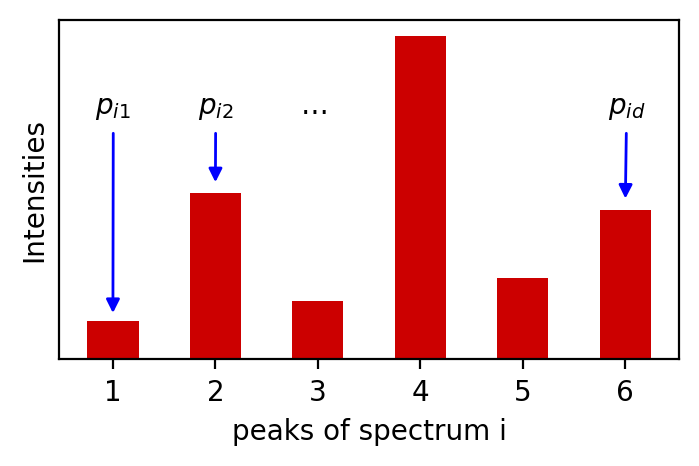

In [44]:
data = st.multinomial(10000, (.05, .2, .07, .4, .1, .18)).rvs(1)

plt.figure(figsize = (8 / 2, 4.5 / 2))

plt.bar([1, 2, 3, 4, 5, 6], data[0], width = .5, color = (0.8, 0, 0))

plt.annotate(r"$p_{i1}$",
             (1, 500),
             (.83, 3000),
             arrowprops = dict(arrowstyle = "-|>", color = "blue")
            )

plt.annotate(r"$p_{i2}$",
             (2, 2100),
             (1.83, 3000),
             arrowprops = dict(arrowstyle = "-|>", color = "blue")
            )

plt.annotate(r"$p_{id}$",
             (6, 1900),
             (5.83, 3000),
             arrowprops = dict(arrowstyle = "-|>", color = "blue")
            )

plt.text(2.83, 3000, r"$\dots$")

plt.yticks([])
plt.xlabel("peaks of spectrum i")
plt.ylabel("Intensities")

(array([0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.400e+01, 3.700e+01,
        9.600e+01, 2.750e+02, 5.300e+02, 8.250e+02, 1.138e+03, 1.411e+03,
        1.505e+03, 1.330e+03, 1.091e+03, 7.210e+02, 5.010e+02, 2.860e+02,
        1.380e+02, 6.800e+01, 2.700e+01, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <BarContainer object of 30 artists>)

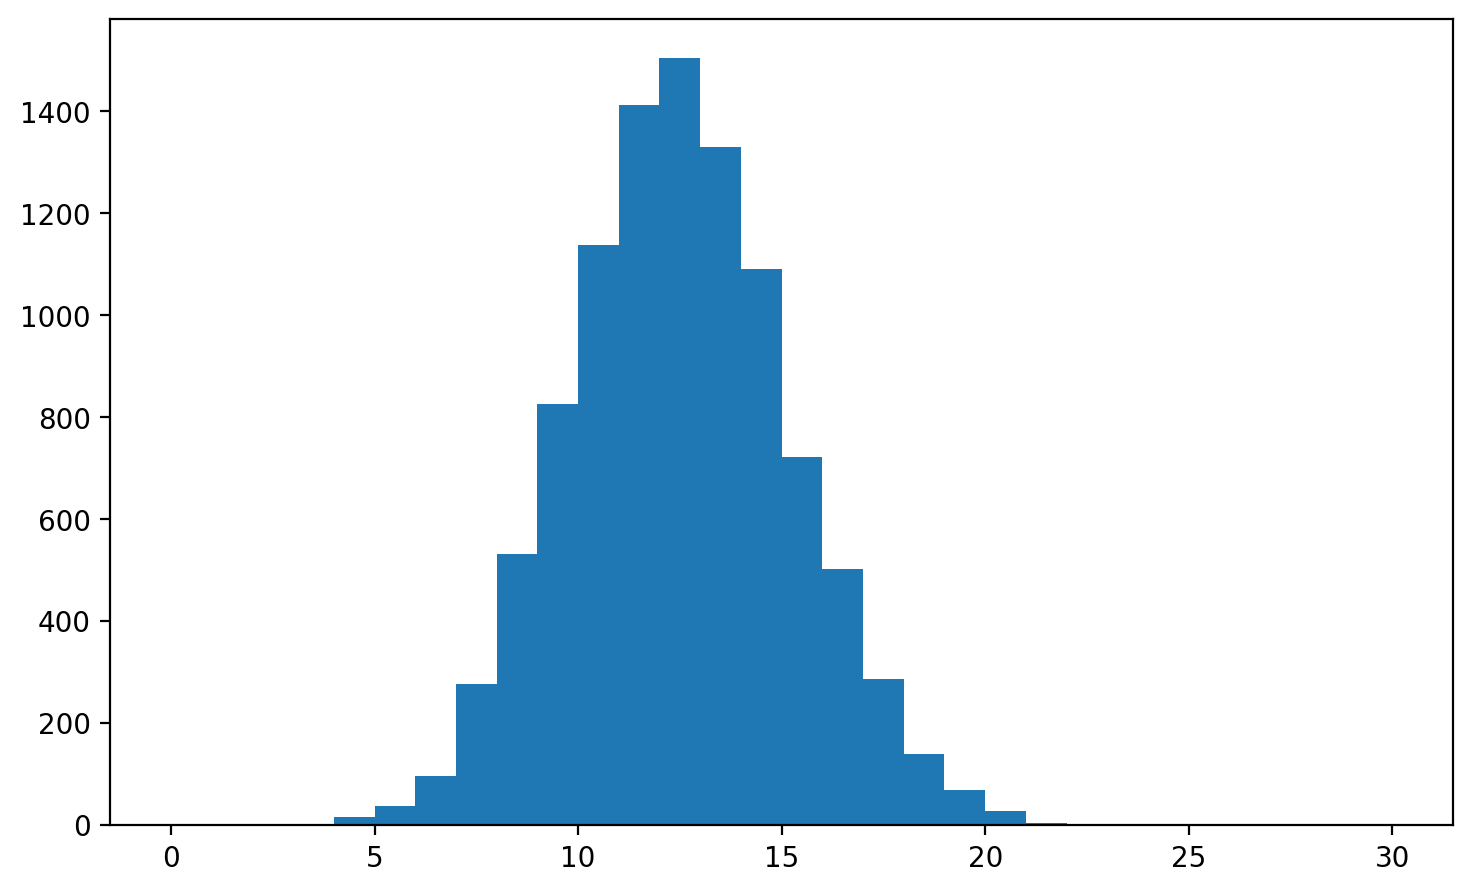

In [8]:
plt.hist(data, bins = range(31))

In [9]:
def logL(p1, p2, n1, n2, x1, x2):
    return x1 * np.log(p1) + (n1 - x1) * np.log(1 - p1) + x2 * np.log(p2) + (n2 - x2) * np.log(1 - p2)

In [10]:
def ll_heatmap(n1, n2, x1, x2, res = 10):

    vec = np.linspace(1 / (2 * res), 1 - 1 / (2 * res), res)

    data = np.zeros((res, res))


    def f(p1, p2):
        return np.exp(logL(p1, p2, n1, n2, x1, x2))

    for i in range(res):
        for j in range(res):
            data[i][j] = f(vec[j], vec[i])
            
    plt.figure(figsize = (5, 5))
    plt.imshow(data, cmap = "jet", norm = cl.PowerNorm(.2), extent = [0, 1, 0, 1], origin = "lower")
    
    plt.xlabel(r"$p_1$")
    plt.ylabel(r"$p_2$", rotation = 0)
    

        


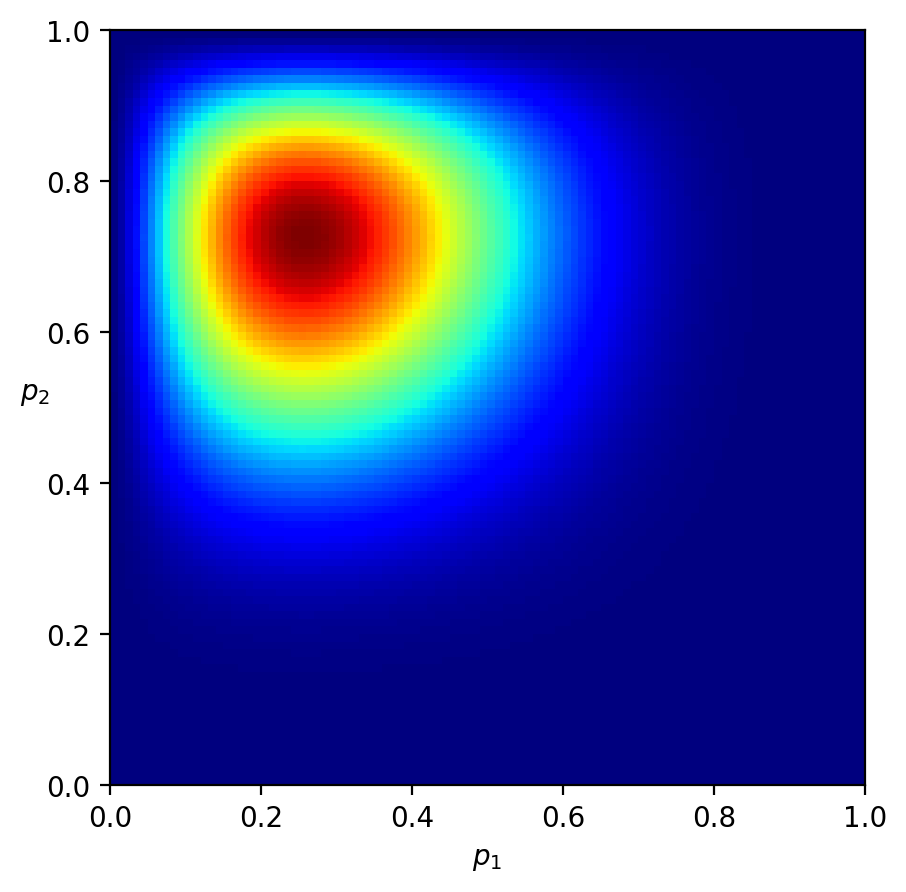

In [11]:
ll_heatmap(31, 33, 8, 24, res = 100)

In [43]:
plt.rcParams["figure.figsize"] = (3, 5)

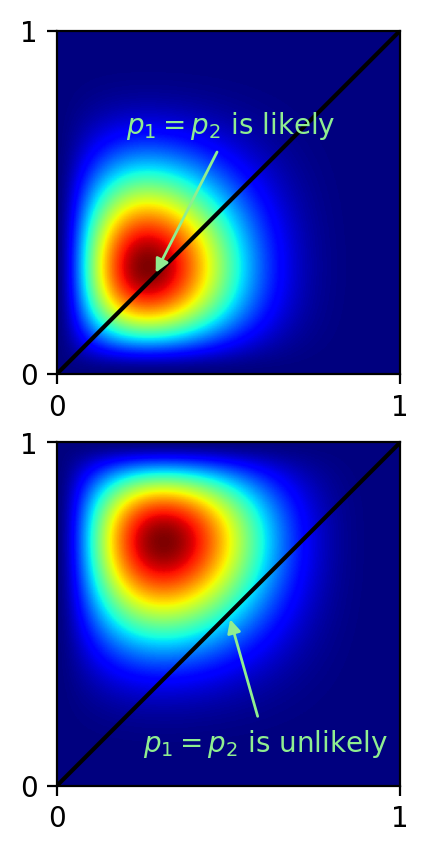

In [74]:
n1, x1 = 34, 9
n2, x2 = 32, 10

res = 200
vec = np.linspace(1 / (2 * res), 1 - 1 / (2 * res), res)

data = np.zeros((res, res))


def f(p1, p2):
    return np.exp(logL(p1, p2, n1, n2, x1, x2))

for i in range(res):
    for j in range(res):
        data[i][j] = f(vec[j], vec[i])

plt.subplot(2, 1, 1)
plt.imshow(data, cmap = "jet", norm = cl.PowerNorm(.2), extent = [0, 1, 0, 1], origin = "lower", label = "Log-liikelihood")

plt.plot([0, 1], [0, 1], "k")
plt.xticks([0, 1])
plt.yticks([0, 1])

plt.annotate(r"$p_1 = p_2$ is likely",
             (0.28, 0.28),
             xytext = (0.2, 0.7),
             arrowprops = dict(arrowstyle = "-|>",
                               color = "lightgreen"
                              ),
             color = "lightgreen"
            )

    
#plt.xlabel(r"$p_1$")
#plt.ylabel(r"$p_2$", rotation = 0)



n1, x1 = 29, 9
n2, x2 = 31, 22

res = 200
vec = np.linspace(1 / (2 * res), 1 - 1 / (2 * res), res)

data = np.zeros((res, res))


def f(p1, p2):
    return np.exp(logL(p1, p2, n1, n2, x1, x2))

for i in range(res):
    for j in range(res):
        data[i][j] = f(vec[j], vec[i])

plt.subplot(2, 1, 2)
plt.imshow(data, cmap = "jet", norm = cl.PowerNorm(.2), extent = [0, 1, 0, 1], origin = "lower", label = "Log-liikelihood")

plt.plot([0, 1], [0, 1], "k")
plt.xticks([0, 1])
plt.yticks([0, 1])

plt.annotate(r"$p_1 = p_2$ is unlikely",
             (0.5, 0.5),
             xytext = (0.25, 0.1),
             arrowprops = dict(arrowstyle = "-|>",
                               color = "lightgreen"
                              ),
             color = "lightgreen"
            )

    
#plt.xlabel(r"$p_1$")
#plt.ylabel(r"$p_2$", rotation = 0)



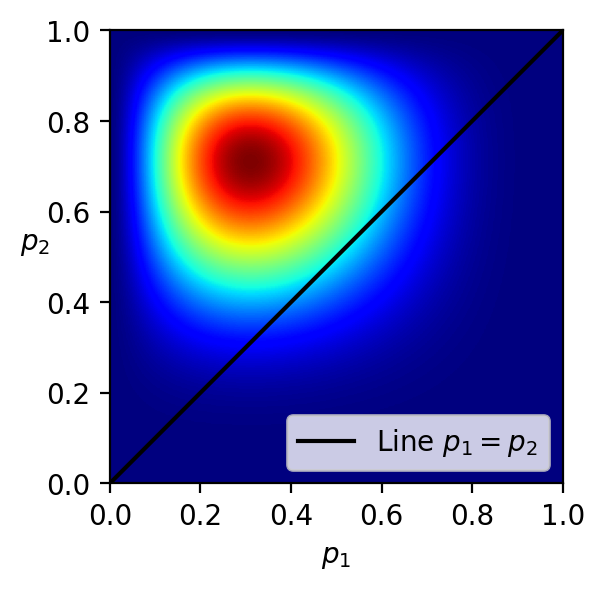

In [36]:
n1, x1 = 29, 9
n2, x2 = 31, 22

res = 200
vec = np.linspace(1 / (2 * res), 1 - 1 / (2 * res), res)

data = np.zeros((res, res))


def f(p1, p2):
    return np.exp(logL(p1, p2, n1, n2, x1, x2))

for i in range(res):
    for j in range(res):
        data[i][j] = f(vec[j], vec[i])
        
plt.imshow(data, cmap = "jet", norm = cl.PowerNorm(.2), extent = [0, 1, 0, 1], origin = "lower", label = "Log-liikelihood")

plt.plot([0, 1], [0, 1], "k", label = r"$x = y$")
    
plt.xlabel(r"$p_1$")
plt.ylabel(r"$p_2$", rotation = 0)

plt.legend(loc = "lower right")


plt.show()

In [23]:
31 * 0.65

20.150000000000002

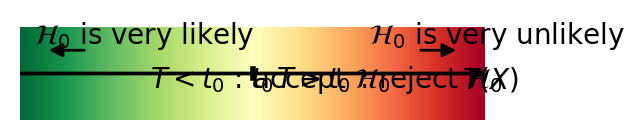

In [16]:
plt.imshow([1 - np.linspace(0, 1, 1000)], extent =[0, 10, -1, 1], cmap = "RdYlGn")

plt.arrow(0, 0, 10, 0, color = "k",
          width = 0.02,
          head_width = 0.2,
          length_includes_head = True
         )

plt.text(9.5, -.3, r"$T(X)$")

plt.plot([5, 5], [.1, -.1], color = "k", linewidth = 2)
plt.text(4.95, -.3, r"$t_0$")

plt.text(2.8, -0.3, r"$T < t_0$ : accept $\mathcal{H}_0$")

plt.text(5.5, -0.3, r"$T > t_0$ : reject $\mathcal{H}_0$")


plt.text(0.3, 0.65, r"$\mathcal{H}_0$ is very likely")

plt.annotate("",
             (0.5, 0.5),
             xytext = (1.5, 0.5),
             arrowprops = dict(arrowstyle = "-|>", color = "k")
            )

plt.text(7.5, 0.65, r"$\mathcal{H}_0$ is very unlikely")
plt.annotate("",
             (9.5, 0.5),
             xytext = (8.5, 0.5),
             arrowprops = dict(arrowstyle = "-|>", color = "k")
            )


ax = plt.gca()
ax.set_axis_off()


plt.show()

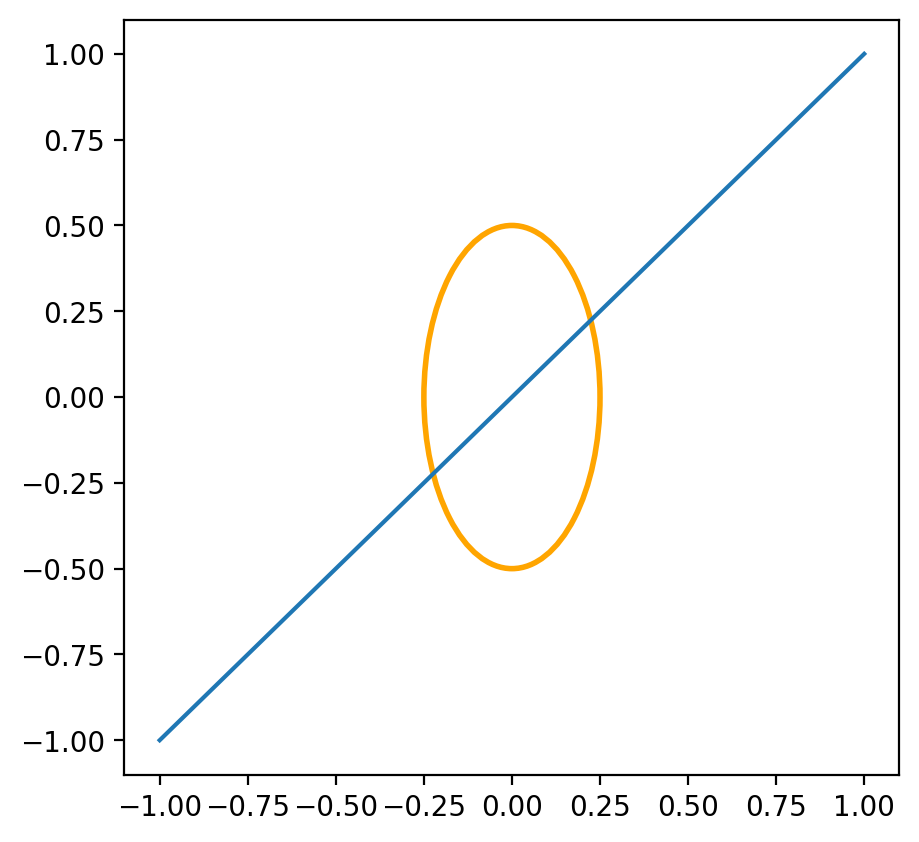

In [17]:
#testing the ellipse feature

plt.figure(figsize = (5, 5))

plt.plot([-1, 1], [-1, 1])
ax = plt.gca()

ax.add_patch(loop((0, 0), .5, 1, color = "orange", fill = False, lw = 2))
